# 1. Install libraries

In [1]:
!pip install pandas
!pip install matplotlib
!pip install pyodbc

# 2. Connecting to Azure SQL server 

In [2]:
import pandas as pd
import pyodbc as odbc
import matplotlib.pyplot as plt

#connecting to server using odbc
sql_conn = odbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=Johndroescher.com;DATABASE=Fall_2022;UID=satasnimahmed375;PWD=CCny23349375;')

#create dataframs using SQL Queries
query_1 = "SELECT * FROM violation_data"
df1 = pd.read_sql(query_1, sql_conn) #df1 has violation data

query_2 = "SELECT * FROM restaurant_data"
df2 = pd.read_sql(query_2, sql_conn) #df2 has restaurant data

# 3. Check if the data is available from the server

In [3]:
# print the first 2 rows 
df1.head(2)

,column1,camis,violation_code,violation_description,action,score,inspection_type,grade,grade_date,inspection_date,critical_flag,record_date
0,11332,50010393,04N,Filth flies or food/refuse/sewage-associated (...,Violations were cited in the following area(s).,12.0,Cycle Inspection / Re-inspection,A,2019-10-15,2019-10-15,Critical,2022-08-27 06:00:12
1,11333,50099700,02B,Hot food item not held at or above 140º F.,Violations were cited in the following area(s).,13.0,Pre-permit (Operational) / Re-inspection,A,2020-01-30,2020-01-30,Critical,2022-08-27 06:00:12


In [4]:
# print the last two rows
df2.tail(2)

,column1,camis,dba,boro,building,street,zipcode,phone,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,cuisine_description
27958,176356,50127067,ZHU CHEN,Bronx,2647,JEROME AVENUE,10468,3472163843,40.866947,-73.897812,207,14,26500.0,2014397.0,2032020038,BX30,None
27959,186130,50127068,None,Brooklyn,706,56 STREET,11220,7183087684,40.638916,-74.009163,307,38,10400.0,3015509.0,3008420010,BK34,None


# 4. Combine restaurant_data table and violation_data table

In [5]:
merged_data = pd.merge(df1, df2, on='camis')
merged_data.head(2)

,column1_x,camis,violation_code,violation_description,action,score,inspection_type,grade,grade_date,inspection_date,...,phone,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,cuisine_description
0,11332,50010393,04N,Filth flies or food/refuse/sewage-associated (...,Violations were cited in the following area(s).,12.0,Cycle Inspection / Re-inspection,A,2019-10-15,2019-10-15,...,2123043611,40.867432,-73.921059,112,10,29300.0,1082051.0,1022350020,MN01,Hamburgers
1,18909,50010393,08A,Facility not vermin proof. Harborage or condit...,Violations were cited in the following area(s).,32.0,Cycle Inspection / Initial Inspection,None,NaT,2019-07-25,...,2123043611,40.867432,-73.921059,112,10,29300.0,1082051.0,1022350020,MN01,Hamburgers


In [6]:
print("Total number of restaurants in NYC ",len(df2.index))
print("Total number of violations in NYC restaurants",len(df1.index))
print("Total number of rows after merging the two tables",len(merged_data.index))

Total number of restaurants in NYC  27960
Total number of violations in NYC restaurants 248020
Total number of rows after merging the two tables 248020


# 5. Cleaning data 
1. check if the data contains any null or zero values 
2. remove all the null and zero values from the data 

In [7]:
# checking if boro column has any null data 
# there is about 77 values that has zero on the boro column
merged_data[['boro']].value_counts()

boro         
Manhattan        93120
Brooklyn         63282
Queens           59307
Bronx            24053
Staten Island     8181
0                   77
dtype: int64

In [8]:
# the dropna() method will remove all the zero values
data_frame_4 = merged_data.dropna() #if there is any null value drop it 
data_frame_4[['boro']].value_counts()

boro         
Manhattan        41232
Brooklyn         28351
Queens           26402
Bronx            10689
Staten Island     4108
dtype: int64

In [9]:
print("Total number of Merged data after droping the null values",len(data_frame_4.index))

Total number of Merged data after droping the null values 110782


# Pie chart using the top 6 restaurants in NYC

In [60]:
slices = data_frame_4[['dba']].value_counts().nlargest(n=6)
slices

dba        
DUNKIN         1865
SUBWAY          929
STARBUCKS       898
MCDONALD'S      808
POPEYES         409
BURGER KING     368
dtype: int64

In [61]:
values = slices.values
labels = slices.index

[1865  929  898  808  409  368]
MultiIndex([(     'DUNKIN',),
            (     'SUBWAY',),
            (  'STARBUCKS',),
            ( 'MCDONALD'S',),
            (    'POPEYES',),
            ('BURGER KING',)],
           names=['dba'])


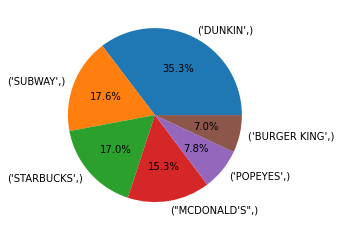

In [62]:
#pie chart of the entire nyc
plt.pie(slices, labels = labels,autopct="%1.1f%%")
plt.show()

# 6. Boro with the most restaurants

(array([41232., 28351., 26402.,  4108., 10689.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

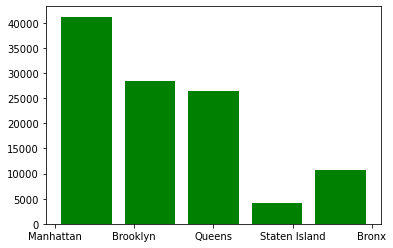

In [64]:
# This graph shows the number of restaurants in each boro
# This is a histogram with the data divided into 5 bins based on the boro
bins = 5
  
# plotting a histogram
plt.hist(data_frame_4['boro'], bins, color = 'green',histtype = 'bar', rwidth = 0.8)

# 7. Number of violation grades

(array([8.9508e+04, 5.2060e+03, 1.1867e+04, 3.1360e+03, 1.0550e+03,
        1.0000e+01]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

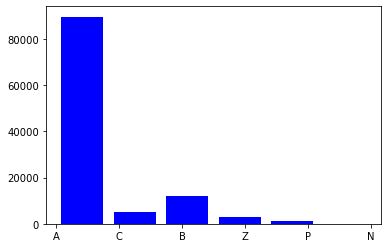

In [65]:
plt.hist(data_frame_4['grade'], 6, color = 'blue',histtype = 'bar', rwidth = 0.8)

# 8. Plot of Grade by Boro

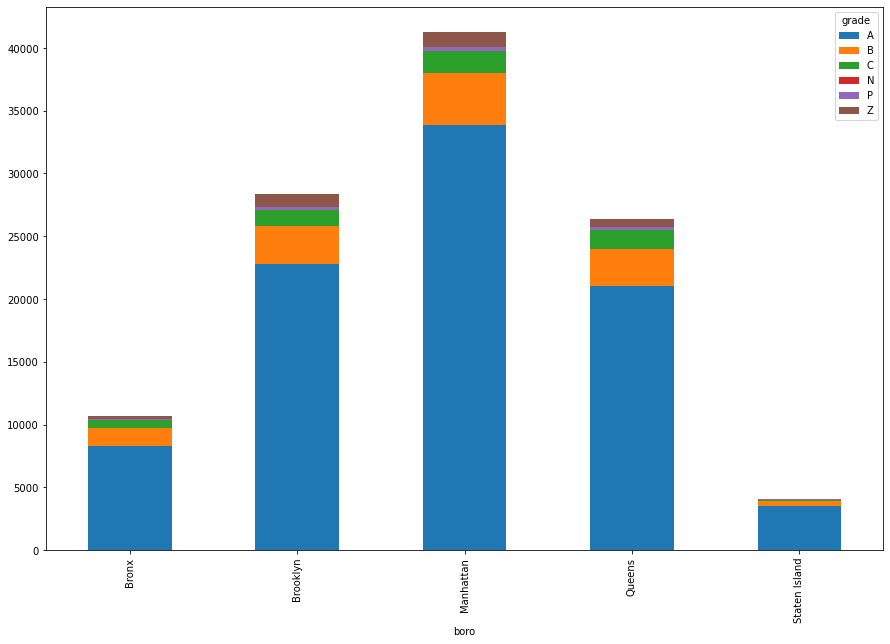

In [66]:
# Bar graph based on boro and grouped by grades
data_frame_4.groupby(['boro','grade']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 10))
plt.show()
# Majority of the inspection grades are A

In [67]:
#shows the most popular cuisine in each boro
number_of_cuisine = data_frame_4[['boro','cuisine_description']].value_counts()
number_of_cuisine

# results show that American cuisine is the most popular in Manhattan, Brooklyn, and Queens.

boro       cuisine_description
Manhattan  American               11015
Brooklyn   American                4984
Queens     American                3794
Manhattan  Coffee/Tea              3294
Queens     Chinese                 3257
                                  ...  
           Vegan                      2
Brooklyn   Fruits/Vegetables          1
Manhattan  Creole/Cajun               1
Brooklyn   English                    1
Manhattan  Armenian                   1
Length: 337, dtype: int64

In [68]:
# dont need it 
hidhest_violation = data_frame_4[['camis','dba']].value_counts().nlargest(n=10)
print(hidhest_violation)

camis     dba                            
41474882  BUKA                               39
41187577  HANSOL NUTRITION CENTER            30
40400811  CAFE VOLNA                         28
50085082  FLAMING GRILL AND MODERN BUFFET    28
50044955  ONE EAST OCEAN PALACE              28
40762853  GREAT N.Y. NOODLETOWN              27
50073724  COM TAM NINH KIEU                  27
41703394  PIONEERS BAR & LOUNGE              27
50046867  PICNIC WORLD CORP                  26
41582631  TINY'S AND THE BAR UPSTAIRS        26
dtype: int64


# Pie chart using the top 10 restaurants in NYC

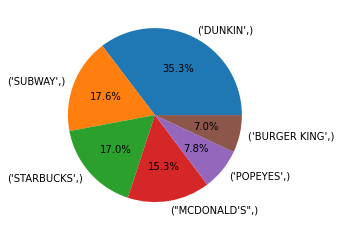

In [75]:
# pie chart of dba with in manhattan
restaurants_in_manhattan = data_frame_4.loc[(data_frame_4['boro'] == 'Manhattan')]
#taking the top 6 values for the pie slice
slices_2 = restaurants_in_manhattan[['dba']].value_counts().nlargest(n=6)
# parameters for the chart
values_2 = slices.values
labels_2 = slices.index
#pie chart of Manhattan only
plt.pie(slices, labels = labels,autopct="%1.1f%%")
plt.show()

# 9. Filter location based on the above data
    1. Find all the restaurants located in Manhattan
    2. Filter all the restaurants that are only American cuisine
    3. Filter restaurants with only A grades 

In [69]:
# Filter the data based on Manhattan, American cuisine, and has a grade A
data_frame_5 = data_frame_4.loc[(data_frame_4['boro'] == 'Manhattan') & (data_frame_4['cuisine_description'] == 'American')]
data_frame_5 = data_frame_5.loc[(data_frame_5['grade'] == 'A')]
print("Number of restaurants that are in Manhattan, American cuisine, and has a grade A:", len(data_frame_5.index))

Number of restaurants that are in Manhattan, American cuisine, and has a grade A: 9546


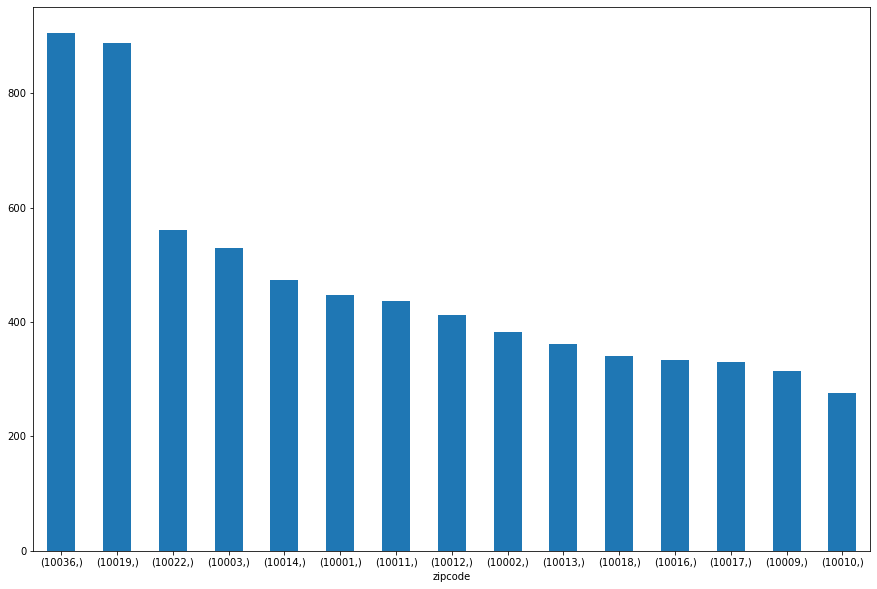

In [70]:
# Find the top 15 zipcodes with the most number of restaurants in a graph 
df = data_frame_5[['zipcode']].value_counts().nlargest(n=15)
df.plot.bar(y='grade', rot=0,figsize=(15, 10))
plt.show()

In [ ]:
# same data as above graph, top 20 zipcodes with the most restaurants 
data_frame_5[['zipcode']].value_counts().nlargest(n=20)

# 10. Conclusion
These are the top 20 locations based on zip code that are suitable for an American cuisine restaurant. Zip code 10036 has the highest number of American cuisine restaurants. This also means that 10036 is the most competitive location. Any zip code with less than 400 restaurants is suitable for an American cuisine restaurant with less competition.  